In [8]:
#!pip install pystan

In [9]:
#!pip install fbprophet

In [10]:
# Import libraries
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [11]:
# Read in data
df = pd.read_csv('/Users/jon/dat11syd/data/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [12]:
# Fit a time series model
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/DataScience/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [13]:
# Predict future time series
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [14]:
# Attach predicted values - yhat
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209074,7.517421,8.916941
3266,2017-01-16,8.534139,7.833058,9.242737
3267,2017-01-17,8.321541,7.608655,9.058487
3268,2017-01-18,8.154138,7.455799,8.830528
3269,2017-01-19,8.166091,7.436771,8.921408


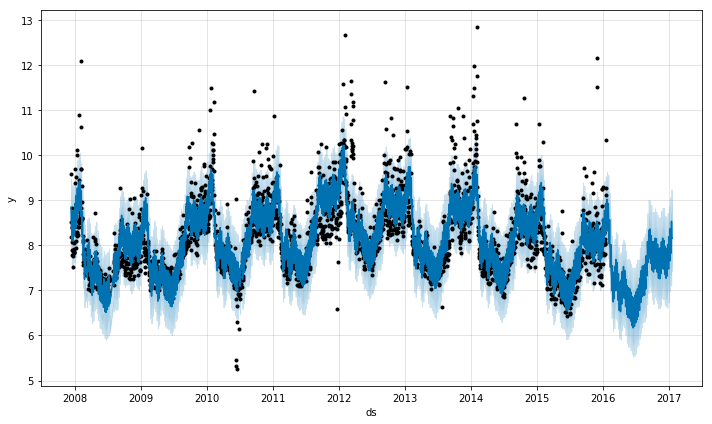

In [15]:
# Plot the forecasted values
from matplotlib import pyplot as plt
%matplotlib inline

m.plot(forecast);

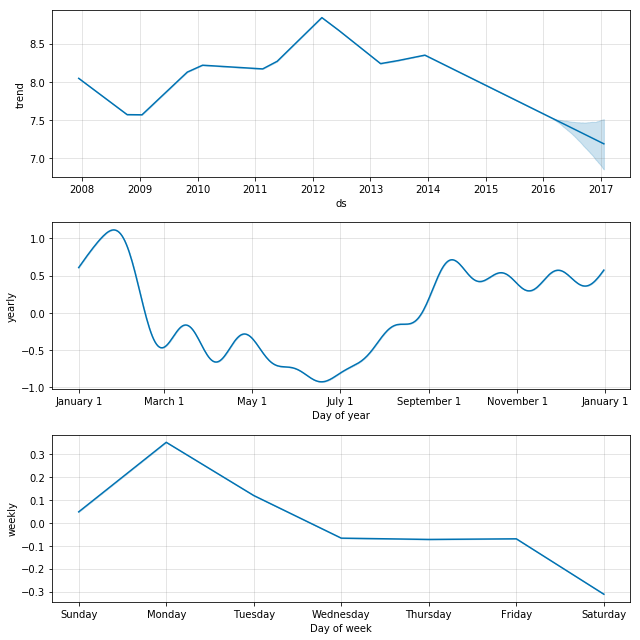

In [17]:
# Time Series Decomposition
m.plot_components(forecast);